<a href="https://colab.research.google.com/github/saivenkat2309/ML_A1/blob/main/Ass_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [341]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [342]:
t_c = [0.4, 14.0, 15.0, 29.0, 11.0, 8.0, 4.0, -4.0, 6.0, 14.0, 22.0]
t_u = [35.7, 54.9, 58.3, 81.9, 56.3, 48.9, 33.8, 21.8, 48.4, 60.3, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [343]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b # description for our model w2 * t_u ** 2 + w1 * t_u + b.

In [344]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [345]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 550 ==0:
            print(f"Epoch {epoch}, loss {loss.item():.4f}")

    return params

In [346]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [347]:
t_un = 0.1 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 649.2491
Epoch 550, loss 3.2444
Epoch 1100, loss 2.9760
Epoch 1650, loss 2.7977
Epoch 2200, loss 2.7221
Epoch 2750, loss 2.7024
Epoch 3300, loss 2.6995
Epoch 3850, loss 2.6993
Epoch 4400, loss 2.6993
Epoch 4950, loss 2.6993


tensor([ 2.1994,  0.3234, -9.9929], requires_grad=True)

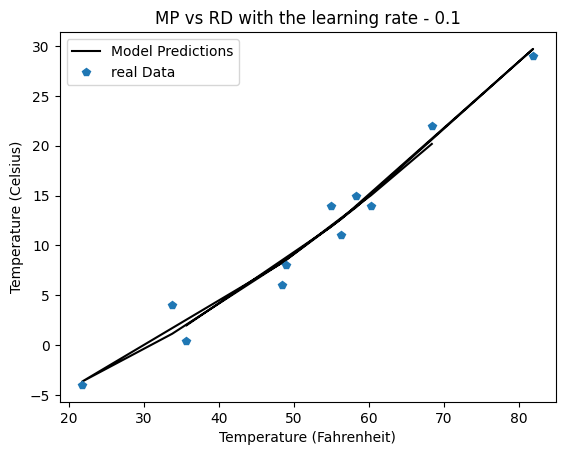

In [348]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')#set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("MP vs RD with the learning rate - 0.1")
plt.legend()
plt.show()# display the plot

In [349]:
t_un = 0.01 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=6000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 138.3838
Epoch 550, loss 50.8195
Epoch 1100, loss 39.5734
Epoch 1650, loss 31.2737
Epoch 2200, loss 23.1321
Epoch 2750, loss 16.0356
Epoch 3300, loss 10.5039
Epoch 3850, loss 6.6815
Epoch 4400, loss 4.3980
Epoch 4950, loss 3.2695
Epoch 5500, loss 2.8383


tensor([22.9665, 30.4573, -9.9256], requires_grad=True)

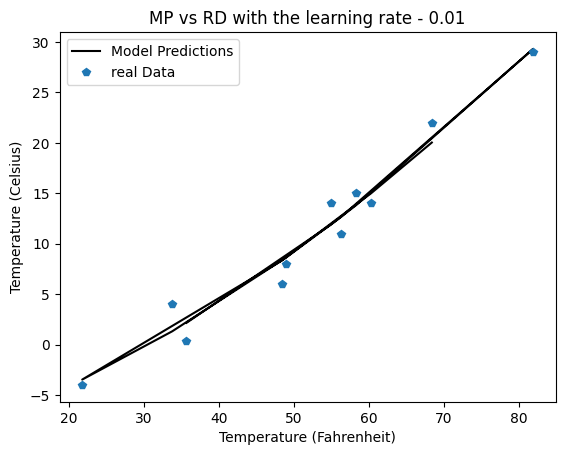

In [350]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')#set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("MP vs RD with the learning rate - 0.01")
plt.legend()
plt.show()# display the plot

In [351]:
t_un = 0.01 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=6500,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 138.3838
Epoch 550, loss 120.4981
Epoch 1100, loss 105.2444
Epoch 1650, loss 92.3218
Epoch 2200, loss 81.4579
Epoch 2750, loss 72.4287
Epoch 3300, loss 65.0417
Epoch 3850, loss 59.1212
Epoch 4400, loss 54.4925
Epoch 4950, loss 50.9669
Epoch 5500, loss 48.3275
Epoch 6050, loss 46.3201


tensor([7.1707, 7.5006, 5.0520], requires_grad=True)

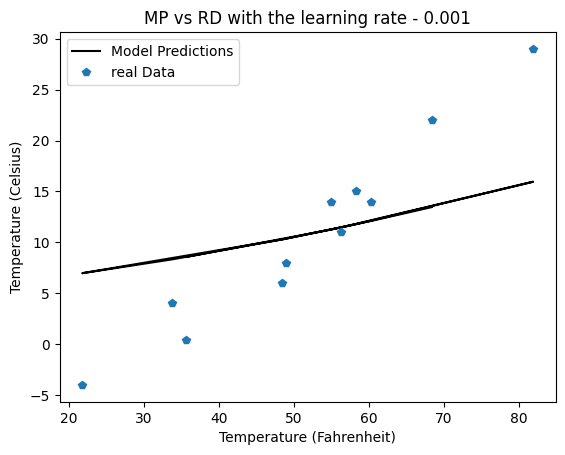

In [352]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')#set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("MP vs RD with the learning rate - 0.001")
plt.legend()
plt.show()#display the plot

In [353]:
t_un = 0.1 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=6800,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 4261.1919
Epoch 550, loss 19.1867
Epoch 1100, loss 14.4566
Epoch 1650, loss 11.2110
Epoch 2200, loss 8.9836
Epoch 2750, loss 7.4546
Epoch 3300, loss 6.4046
Epoch 3850, loss 5.6831
Epoch 4400, loss 5.1870
Epoch 4950, loss 4.8454
Epoch 5500, loss 4.6098
Epoch 6050, loss 4.4469
Epoch 6600, loss 4.3339


tensor([-1.1905,  0.6061, -0.4035], requires_grad=True)

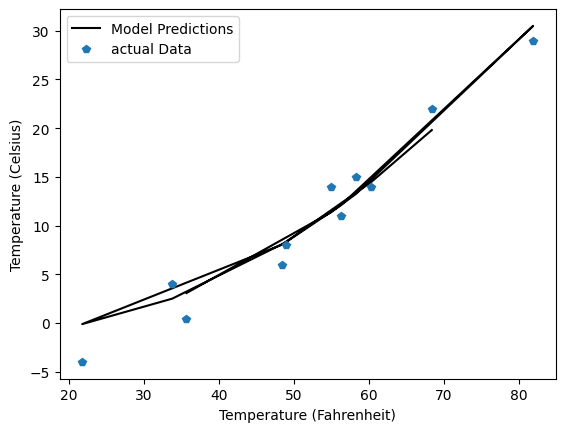

In [354]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')# set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='actual Data')
plt.legend()
plt.show()# dispay the plot

In [355]:
t_un = 0.01*t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=6800,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 138.3838
Epoch 550, loss 2.7167
Epoch 1100, loss 2.7077
Epoch 1650, loss 2.7068
Epoch 2200, loss 2.7060
Epoch 2750, loss 2.7053
Epoch 3300, loss 2.7047
Epoch 3850, loss 2.7042
Epoch 4400, loss 2.7037
Epoch 4950, loss 2.7032
Epoch 5500, loss 2.7028
Epoch 6050, loss 2.7025
Epoch 6600, loss 2.7021


tensor([ 23.6666,  30.7411, -10.3887], requires_grad=True)

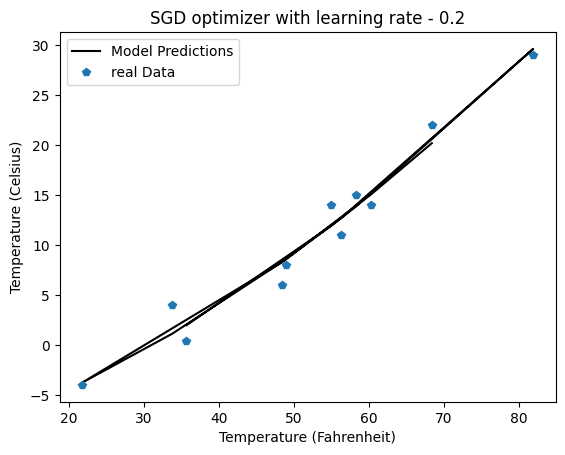

In [356]:
t_p = model(t_un, *params)

plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')# set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("SGD optimizer with learning rate - 0.2")
plt.legend()
plt.show()#display the plots

In [357]:
t_un =0.1* t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.00000001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=6700,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 4261.1919
Epoch 550, loss 4154.0991
Epoch 1100, loss 4049.5330
Epoch 1650, loss 3947.6072
Epoch 2200, loss 3848.2666
Epoch 2750, loss 3751.4453
Epoch 3300, loss 3657.0718
Epoch 3850, loss 3565.0830
Epoch 4400, loss 3475.4431
Epoch 4950, loss 3388.0623
Epoch 5500, loss 3302.8909
Epoch 6050, loss 3219.8850
Epoch 6600, loss 3138.9744


tensor([1.9567, 1.7278, 0.9926], requires_grad=True)

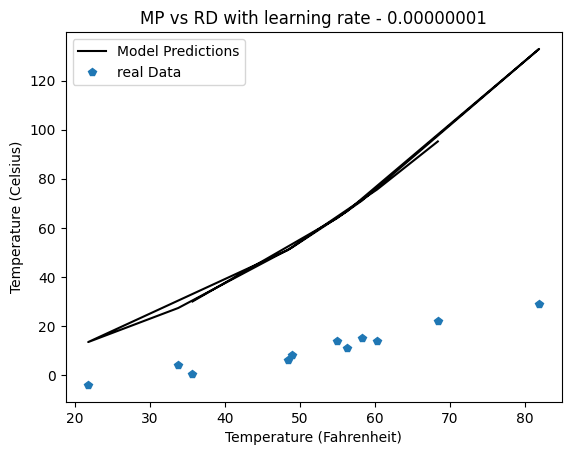

In [358]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')# set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
# Plot the real data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')
plt.title("MP vs RD with learning rate - 0.00000001")
plt.legend()
plt.show()# dosplay the plots

In [359]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [360]:
df = pd.read_csv('/opt/google/drive/Housing.csv')

# Display the last 5 rows of the DataFrame
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [361]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [362]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
df[input_features] = scaler_x.fit_transform(df[input_features])
df[[output_feature]] = scaler_y.fit_transform(df[[output_feature]])

In [363]:
X = df[input_features].values
y = df[[output_feature]].values

In [364]:
X_t = torch.tensor(X)
y_t = torch.tensor(y)

In [365]:
def model(X, W1,W2,W3,W4,W5,B):
  return W5*X[:,4] + W4*X[:,3] + W3*X[:,2] + W2*X[:,1] + W1*X[:,0] + B

In [366]:
np.random.seed(13)
train_X, val_X, train_Y, val_Y = train_test_split(X_t, y_t, test_size=0.2, random_state=100)

In [367]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

(torch.Size([436, 5]),
 torch.Size([436, 1]),
 torch.Size([109, 5]),
 torch.Size([109, 1]))

In [368]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

(torch.Size([436, 5]),
 torch.Size([436, 1]),
 torch.Size([109, 5]),
 torch.Size([109, 1]))

In [369]:
def training_loop(n_epochs, optimizer, params, X_train, X_val, y_train, y_val):

    for epoch in range(1, n_epochs + 1):
        y_train_p = model(X_train, *params)
        train_loss = loss_fn(y_train_p, y_train)

        y_val_p = model(X_train, *params)
        val_loss = loss_fn(y_val_p, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return params

In [370]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 6000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.0261, Validation loss 0.0266
Epoch 1000, Training loss 0.0261, Validation loss 0.0266
Epoch 1500, Training loss 0.0261, Validation loss 0.0266
Epoch 2000, Training loss 0.0261, Validation loss 0.0266
Epoch 2500, Training loss 0.0261, Validation loss 0.0266
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266
Epoch 5500, Training loss 0.0261, Validation loss 0.0266
Epoch 6000, Training loss 0.0261, Validation loss 0.0266


tensor([-0.0014, -0.0014, -0.0013, -0.0014, -0.0013,  0.2623],
       requires_grad=True)

In [371]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 6000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.0298, Validation loss 0.0301
Epoch 1000, Training loss 0.0264, Validation loss 0.0269
Epoch 1500, Training loss 0.0261, Validation loss 0.0266
Epoch 2000, Training loss 0.0261, Validation loss 0.0266
Epoch 2500, Training loss 0.0261, Validation loss 0.0266
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266
Epoch 5500, Training loss 0.0261, Validation loss 0.0266
Epoch 6000, Training loss 0.0261, Validation loss 0.0266


tensor([ 7.8823e-08,  1.6259e-07, -3.7555e-08, -2.2325e-09,  3.6543e-09,
         2.6370e-01], requires_grad=True)

In [372]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 6000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.2111, Validation loss 0.2159
Epoch 1000, Training loss 0.1098, Validation loss 0.1093
Epoch 1500, Training loss 0.0766, Validation loss 0.0759
Epoch 2000, Training loss 0.0532, Validation loss 0.0528
Epoch 2500, Training loss 0.0397, Validation loss 0.0396
Epoch 3000, Training loss 0.0332, Validation loss 0.0333
Epoch 3500, Training loss 0.0302, Validation loss 0.0305
Epoch 4000, Training loss 0.0286, Validation loss 0.0290
Epoch 4500, Training loss 0.0275, Validation loss 0.0280
Epoch 5000, Training loss 0.0268, Validation loss 0.0273
Epoch 5500, Training loss 0.0264, Validation loss 0.0269
Epoch 6000, Training loss 0.0262, Validation loss 0.0267


tensor([ 0.0169,  0.0801, -0.0241, -0.0115, -0.0044,  0.2343],
       requires_grad=True)

In [373]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 6000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.2111, Validation loss 0.2159
Epoch 1000, Training loss 0.1098, Validation loss 0.1093
Epoch 1500, Training loss 0.0766, Validation loss 0.0759
Epoch 2000, Training loss 0.0532, Validation loss 0.0528
Epoch 2500, Training loss 0.0397, Validation loss 0.0396
Epoch 3000, Training loss 0.0332, Validation loss 0.0333
Epoch 3500, Training loss 0.0302, Validation loss 0.0305
Epoch 4000, Training loss 0.0286, Validation loss 0.0290
Epoch 4500, Training loss 0.0275, Validation loss 0.0280
Epoch 5000, Training loss 0.0268, Validation loss 0.0273
Epoch 5500, Training loss 0.0264, Validation loss 0.0269
Epoch 6000, Training loss 0.0262, Validation loss 0.0267


tensor([ 0.0169,  0.0801, -0.0241, -0.0115, -0.0044,  0.2343],
       requires_grad=True)

In [374]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 6000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.0266, Validation loss 0.0271
Epoch 1000, Training loss 0.0261, Validation loss 0.0266
Epoch 1500, Training loss 0.0261, Validation loss 0.0266
Epoch 2000, Training loss 0.0261, Validation loss 0.0266
Epoch 2500, Training loss 0.0261, Validation loss 0.0266
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266
Epoch 5500, Training loss 0.0261, Validation loss 0.0266
Epoch 6000, Training loss 0.0261, Validation loss 0.0266


tensor([ 6.6232e-07,  1.3975e-06, -3.3293e-07, -2.2047e-08,  3.0352e-08,
         2.6370e-01], requires_grad=True)

In [375]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 6000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.0922, Validation loss 0.0920
Epoch 1000, Training loss 0.0476, Validation loss 0.0478
Epoch 1500, Training loss 0.0357, Validation loss 0.0360
Epoch 2000, Training loss 0.0315, Validation loss 0.0319
Epoch 2500, Training loss 0.0295, Validation loss 0.0299
Epoch 3000, Training loss 0.0283, Validation loss 0.0288
Epoch 3500, Training loss 0.0276, Validation loss 0.0281
Epoch 4000, Training loss 0.0271, Validation loss 0.0276
Epoch 4500, Training loss 0.0268, Validation loss 0.0273
Epoch 5000, Training loss 0.0266, Validation loss 0.0271
Epoch 5500, Training loss 0.0264, Validation loss 0.0269
Epoch 6000, Training loss 0.0263, Validation loss 0.0269


tensor([ 0.0752,  0.0904, -0.0139, -0.0208, -0.0203,  0.2219],
       requires_grad=True)

In [376]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.3232, Validation loss 0.3289
Epoch 1000, Training loss 0.2264, Validation loss 0.2273
Epoch 1500, Training loss 0.1961, Validation loss 0.1959
Epoch 2000, Training loss 0.1735, Validation loss 0.1730
Epoch 2500, Training loss 0.1544, Validation loss 0.1538
Epoch 3000, Training loss 0.1379, Validation loss 0.1374
Epoch 3500, Training loss 0.1238, Validation loss 0.1234
Epoch 4000, Training loss 0.1116, Validation loss 0.1112
Epoch 4500, Training loss 0.1011, Validation loss 0.1008
Epoch 5000, Training loss 0.0921, Validation loss 0.0919


tensor([ 0.6256,  0.5395,  0.5578,  0.2359,  0.2905, -0.3159],
       requires_grad=True)

In [377]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 6000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 1.1216, Validation loss 1.1433
Epoch 1000, Training loss 0.9167, Validation loss 0.9356
Epoch 1500, Training loss 0.7602, Validation loss 0.7766
Epoch 2000, Training loss 0.6405, Validation loss 0.6546
Epoch 2500, Training loss 0.5487, Validation loss 0.5609
Epoch 3000, Training loss 0.4781, Validation loss 0.4886
Epoch 3500, Training loss 0.4236, Validation loss 0.4327
Epoch 4000, Training loss 0.3815, Validation loss 0.3893
Epoch 4500, Training loss 0.3487, Validation loss 0.3554
Epoch 5000, Training loss 0.3230, Validation loss 0.3288
Epoch 5500, Training loss 0.3028, Validation loss 0.3077
Epoch 6000, Training loss 0.2867, Validation loss 0.2908


tensor([ 0.8212,  0.7316,  0.8784,  0.7245,  0.7529, -0.5410],
       requires_grad=True)

In [379]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 1.1216, Validation loss 1.1433
Epoch 1000, Training loss 0.9167, Validation loss 0.9356
Epoch 1500, Training loss 0.7602, Validation loss 0.7766
Epoch 2000, Training loss 0.6405, Validation loss 0.6546
Epoch 2500, Training loss 0.5487, Validation loss 0.5609
Epoch 3000, Training loss 0.4781, Validation loss 0.4886
Epoch 3500, Training loss 0.4236, Validation loss 0.4327
Epoch 4000, Training loss 0.3815, Validation loss 0.3893
Epoch 4500, Training loss 0.3487, Validation loss 0.3554
Epoch 5000, Training loss 0.3230, Validation loss 0.3288


tensor([ 0.8370,  0.7538,  0.8923,  0.7531,  0.7787, -0.5063],
       requires_grad=True)

In [380]:
df = pd.read_csv('/opt/google/drive/Housing.csv')

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [390]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [391]:
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

In [397]:
X = df.drop('price', axis = 1)
y = df[['price']]

In [398]:
scalar = MinMaxScaler()
scalar_out = MinMaxScaler()
X = scalar.fit_transform(X)
y = scalar_out.fit_transform(y)

In [400]:
np.random.seed(13)
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=100)

In [401]:
X_train = torch.tensor(train_X)
Y_train = torch.tensor(train_Y)
X_test = torch.tensor(val_X)
Y_test = torch.tensor(val_Y)

In [402]:
def model(X, W1, W2, W3, W4, W5, W6, W7, W8, W9, W10, W11, W12, B):
    return (W12*X[:,11] + W11*X[:,10] + W10*X[:,9] + W9*X[:,8] +
            W8*X[:,7] + W7*X[:,6] + W6*X[:,5] + W5*X[:,4] +
            W4*X[:,3] + W3*X[:,2] + W2*X[:,1] + W1*X[:,0] + B)

In [403]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.0261, Validation loss 0.0266
Epoch 1000, Training loss 0.0261, Validation loss 0.0266
Epoch 1500, Training loss 0.0261, Validation loss 0.0266
Epoch 2000, Training loss 0.0261, Validation loss 0.0266
Epoch 2500, Training loss 0.0261, Validation loss 0.0266
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266


tensor([-6.6333e-10, -2.8577e-09,  5.0130e-10,  1.9384e-10, -9.7802e-10,
         5.4727e-11, -9.7130e-11, -7.5999e-11, -6.0996e-11,  9.2391e-11,
         6.2088e-11, -2.7111e-11,  2.6370e-01], requires_grad=True)

In [404]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.0266, Validation loss 0.0271
Epoch 1000, Training loss 0.0261, Validation loss 0.0266
Epoch 1500, Training loss 0.0261, Validation loss 0.0266
Epoch 2000, Training loss 0.0261, Validation loss 0.0266
Epoch 2500, Training loss 0.0261, Validation loss 0.0266
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266


tensor([ 3.2276e-07,  2.4557e-06, -7.2848e-07, -2.7799e-07,  5.1691e-07,
        -4.1181e-09,  2.7520e-10,  4.8747e-08,  5.8231e-08, -9.2349e-08,
        -2.7086e-08,  1.6358e-08,  2.6370e-01], requires_grad=True)

In [405]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.0589, Validation loss 0.0583
Epoch 1000, Training loss 0.0357, Validation loss 0.0358
Epoch 1500, Training loss 0.0291, Validation loss 0.0295
Epoch 2000, Training loss 0.0270, Validation loss 0.0274
Epoch 2500, Training loss 0.0263, Validation loss 0.0268
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266


tensor([-1.2838e-07,  1.5108e-05, -3.0936e-06, -2.8233e-06,  2.2201e-06,
         7.8887e-08, -5.0029e-07,  4.3964e-08,  3.3469e-07, -8.1730e-07,
        -2.8729e-08,  4.2416e-08,  2.6369e-01], requires_grad=True)

In [406]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)


Epoch 500, Training loss 0.1091, Validation loss 0.1086
Epoch 1000, Training loss 0.0512, Validation loss 0.0513
Epoch 1500, Training loss 0.0365, Validation loss 0.0368
Epoch 2000, Training loss 0.0314, Validation loss 0.0318
Epoch 2500, Training loss 0.0292, Validation loss 0.0297
Epoch 3000, Training loss 0.0281, Validation loss 0.0286
Epoch 3500, Training loss 0.0275, Validation loss 0.0279
Epoch 4000, Training loss 0.0270, Validation loss 0.0275
Epoch 4500, Training loss 0.0268, Validation loss 0.0273
Epoch 5000, Training loss 0.0266, Validation loss 0.0271


tensor([ 0.0988,  0.1282, -0.0022, -0.0337,  0.0057, -0.0051, -0.0059,  0.0025,
        -0.0004, -0.0288, -0.0043, -0.0031,  0.2055], requires_grad=True)

In [407]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 2.7549, Validation loss 2.7894
Epoch 1000, Training loss 0.4335, Validation loss 0.4421
Epoch 1500, Training loss 0.1705, Validation loss 0.1700
Epoch 2000, Training loss 0.1278, Validation loss 0.1260
Epoch 2500, Training loss 0.0987, Validation loss 0.0972
Epoch 3000, Training loss 0.0774, Validation loss 0.0763
Epoch 3500, Training loss 0.0629, Validation loss 0.0621
Epoch 4000, Training loss 0.0531, Validation loss 0.0526
Epoch 4500, Training loss 0.0460, Validation loss 0.0458
Epoch 5000, Training loss 0.0405, Validation loss 0.0405


tensor([ 0.1902,  0.4397, -0.0815,  0.0238,  0.2575, -0.0340,  0.0422,  0.0021,
        -0.0081, -0.0128, -0.0361, -0.0066, -0.1899], requires_grad=True)

In [408]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.7231, Validation loss 0.7263
Epoch 1000, Training loss 0.4842, Validation loss 0.4821
Epoch 1500, Training loss 0.3680, Validation loss 0.3659
Epoch 2000, Training loss 0.2883, Validation loss 0.2866
Epoch 2500, Training loss 0.2324, Validation loss 0.2310
Epoch 3000, Training loss 0.1922, Validation loss 0.1910
Epoch 3500, Training loss 0.1625, Validation loss 0.1615
Epoch 4000, Training loss 0.1401, Validation loss 0.1393
Epoch 4500, Training loss 0.1227, Validation loss 0.1221
Epoch 5000, Training loss 0.1090, Validation loss 0.1085


tensor([ 0.5149,  0.4793,  0.4926,  0.2108,  0.1239,  0.0768,  0.0355,  0.5655,
        -0.0415,  0.2306,  0.0610,  0.0369, -0.4248], requires_grad=True)

In [409]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 11.4071, Validation loss 11.4828
Epoch 1000, Training loss 9.9342, Validation loss 10.0045
Epoch 1500, Training loss 8.6005, Validation loss 8.6656
Epoch 2000, Training loss 7.3940, Validation loss 7.4540
Epoch 2500, Training loss 6.3052, Validation loss 6.3602
Epoch 3000, Training loss 5.3262, Validation loss 5.3763
Epoch 3500, Training loss 4.4505, Validation loss 4.4959
Epoch 4000, Training loss 3.6729, Validation loss 3.7136
Epoch 4500, Training loss 2.9887, Validation loss 3.0248
Epoch 5000, Training loss 2.3937, Validation loss 2.4254


tensor([ 0.5594,  0.5611,  0.5560,  0.5584,  0.5607,  0.5538,  0.5564,  0.5574,
         0.5553,  0.5578,  0.5549,  0.5555, -0.4371], requires_grad=True)

In [410]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 8.1016, Validation loss 8.1635
Epoch 1000, Training loss 5.1495, Validation loss 5.1964
Epoch 1500, Training loss 3.3817, Validation loss 3.4172
Epoch 2000, Training loss 2.3193, Validation loss 2.3459
Epoch 2500, Training loss 1.6770, Validation loss 1.6968
Epoch 3000, Training loss 1.2852, Validation loss 1.2997
Epoch 3500, Training loss 1.0428, Validation loss 1.0533
Epoch 4000, Training loss 0.8898, Validation loss 0.8972
Epoch 4500, Training loss 0.7903, Validation loss 0.7953
Epoch 5000, Training loss 0.7230, Validation loss 0.7262


tensor([ 0.6723,  0.5311,  0.8162,  0.5902, -0.0250,  0.6108,  0.3944,  0.8972,
         0.4281,  0.6200,  0.5405,  0.5116, -1.0482], requires_grad=True)